**Inferences for Population Standard Deviations**

So far we discussed methods of inferential statistics that focus on inferences for one or more population means. In the following sections we consider methods of inferential statistics that focus on inferences for population variances (or standard deviations). Recall that the variance $(\sigma^2)$ and standard deviation $(\sigma)$ are measure of the variation and variability of a variable.

**Inferences for One Population Standard Deviation**

Inferences for one population standard deviation are based on the **chi-square ($\chi^2$) distribution**. A $\chi^2$-distribution is right-skewed probability density curve. The shape of the $\chi^2$-curve is determined by its degrees of freedom ($df$).

![chi_square](chi_square.png)

In order to perform a hypothesis test for one population standard deviation, we relate a $\chi^2$-value to a specified area under a $\chi^2$-curve.

Given $\alpha$, where $\alpha$ corresponds to a probability between $0$ and $1$, $\chi^2_{\alpha}$ denotees the $\chi^2$-value having the area $\alpha$ to its right under $\chi^2$-curve.

![chi_square_alpha](chi_square_alpha.png)

**Interval Estimation of $\sigma$**

The $100(1-\alpha)$% confidence interval for $\sigma$ is 

$$\sqrt{\frac{(n-1)s}{\chi^2_{\alpha/2}}} \le \sigma \le \sqrt{\frac{(n-1)s}{\chi^2_{1-\alpha/2}} }$$

where $n$ is the sample size and $s$ the standard deviation of the sample data.

**One standard deviation $\chi^2$-test**

The hypothesis testing procedure for one standard deviation is called **one standard deviation $\chi^2$-test**. Hypothesis testing for variances follows the same step-wise procedure as hypothesis test for the mean.

\begin{array}{l}
\hline
\ \text{Step 1}  & \text{State the null hypothesis } H_0 \text{ and alternative hypothesis } H_A \text{.}\\
\ \text{Step 2}  & \text{Decide on the significance level, } \alpha\text{.} \\
\ \text{Step 3}  & \text{Compute the value of the test statistic.} \\
\ \text{Step 4} &\text{Determine the $p$-value.} \\
\ \text{Step 5} & \text{If } $p$ \le \alpha \text{, reject }H_0 \text{; otherwise, do not reject } H_0 \text{.} \\
\ \text{Step 6} &\text{Interpret the result of the hypothesis test.} \\
\hline 
\end{array}

The test statistic for a hypothesis test with the null hypothesis $H_0: \sigma = \sigma_0$ for a normally distributed variable is given by

$$\chi^2 = \frac{(n-1)s^2}{\sigma_{0}^2}$$

The variable follows a $\chi^2$-distribution with $n-1$ degrees of freedom.

Be aware, that the one standard deviation $\chi^2$-test is not robust against violations of the normality assumption.

**One-standard-deviation $\chi^2$-test: An example**

In order to get some hands-one experience we apply the **one standard deviation $\chi^2$-test** in an exercise. Therefore we load the *students* data set.

In [1]:
import pandas as pd

students_df = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")

In order to showcase the **one standard deviation $\chi^2$-test** we examine the spread of the height in cm of female students and compare it to the spread of the height of all students (our population). **We want to test, if the standard deviation of the height of female students is less than standard deviation of the height of all students.**

**Data preparation**

We start with data preparation.

- First, we define the standard deviation of the population. In our example the population corresponds to the height of all $8239$ in the data set. We calculate the standard deviation deviation for the *height* variable and assign it the variable name *sigma0*.

- Second, we subset the data set based on the variable *gender*

- Third, we sample $30$ female students and extract the statistic of interest, the standard deviation of the height of female students in our sample.


In [3]:
sigma0 = students_df['height'].std()
sigma0

11.077529134763747

In [4]:
import numpy as np

female = students_df[students_df['gender']=='Female']

n=30

female_sample = np.random.choice(female['height'],n)

sample_sd = np.std(female_sample, ddof=1)

sample_sd

9.088390978314733

Further, we check the normality assumption by plotting a **Q-Q plot**.

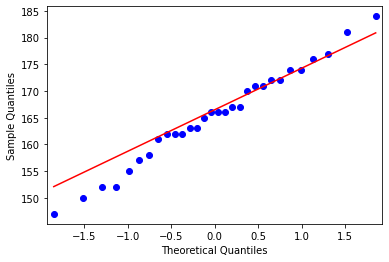

In [7]:
import statsmodels.api as sm

sm.qqplot(female_sample, line='q')

pass

We see that the data falls roughly on a straight line. Based on the graphical evaluation approach we conclude that the variable of interest is roughly normally distributed.

**Hypothesis testing**

In order to conduct the **one standard deviation $\chi^2$-test** we follow the step-wise implementation procedure for hypothesis testing.

**Step 1: State the null hypothesis $H_0$ and alternative hypothesis $H_A$**

The null hypothesis states that the standard deviation of the height of female students $(\sigma)$ equals the standard deviation of the population $(\sigma_0 \approx 11.08$ cm).

$$H_0 : \sigma = \sigma_0$$

**Alternative hypothesis**

$$H_A: \sigma < \sigma_0$$

This formulation results in a left-tailed hypothesis test.

**Step 2: Decide on the significance level, $\alpha$**

$$\alpha = 0.05$$

In [8]:
alpha = 0.05

**Step 3 and 4: Compute the value of the test statistic and the $p$-value.**

For illustration purposes we manually compute the test statistic in Python. Recall the equation for the test statistic from above:

$$\chi^2 = \frac{n-1}{\sigma^2_0}s^2$$

In [9]:
# compute the value of the test statistic

n = len(female_sample)

s2 = (sample_sd)**2

sigma0_2 = (sigma0)**2

x2 = ((n-1)/(sigma0_2))*s2

x2

19.520287053971774

Recall how to calculate the degrees of freedom:
    
$$df = n-1$$

In [13]:
# compute df

df = n-1

from scipy.stats import chi2

# compute the p-value

p = chi2.cdf(x2, df=df)

p

0.092787906860754

**Step 5: If $p \leq \alpha$, reject $H_0$; otherwise, do not reject $H_0$.**

The $p$-value is more than the specified significance level of $0.05$; we do not reject $H_0$. The test results are statistically significant at the $5$% level and do not provide evidence against the null hypothesis.

**Step 6: Interpret the result of the hypothesis test.**

$p=0.092787906860754$ . At the $5$% significance level, the data does not provide evidence to conclude that the standard deviation of the height of female students is less than $11$ cm.